# Heterogeneous CLUE 3D performance analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import rc
from matplotlib import gridspec

rc('text', usetex=False)
rc('font', family='serif', size=34)
rc('figure', figsize=(28,17.75))
rc('axes',linewidth=2)

# CPU vs GPU on Olice-05
Comparison between Intel Xeon Gold 6336Y CPU and Arctic Sound P GPU on Olice-05 CERN machine. 2 by 2 scaling of CPU threads from 1 to 50 and GPU streams from 1 to 20.
```bash
# CPU
for i in {1..10}; do taskset -c 0 ./sycl --dim 3 --device cpu --maxEvents 100 --numberOfThreads 1 >> cpu_1.txt; sleep 1; done

# GPU
for i in {1..10}; do numactl -N 1 ./sycl --dim 3 --device level_zero --maxEvents 10000 --numberOfThreads 1 >> gpu_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 1000 events on CPU until 8 threads, then 10000. On GPU the sample is always over 10000 events.

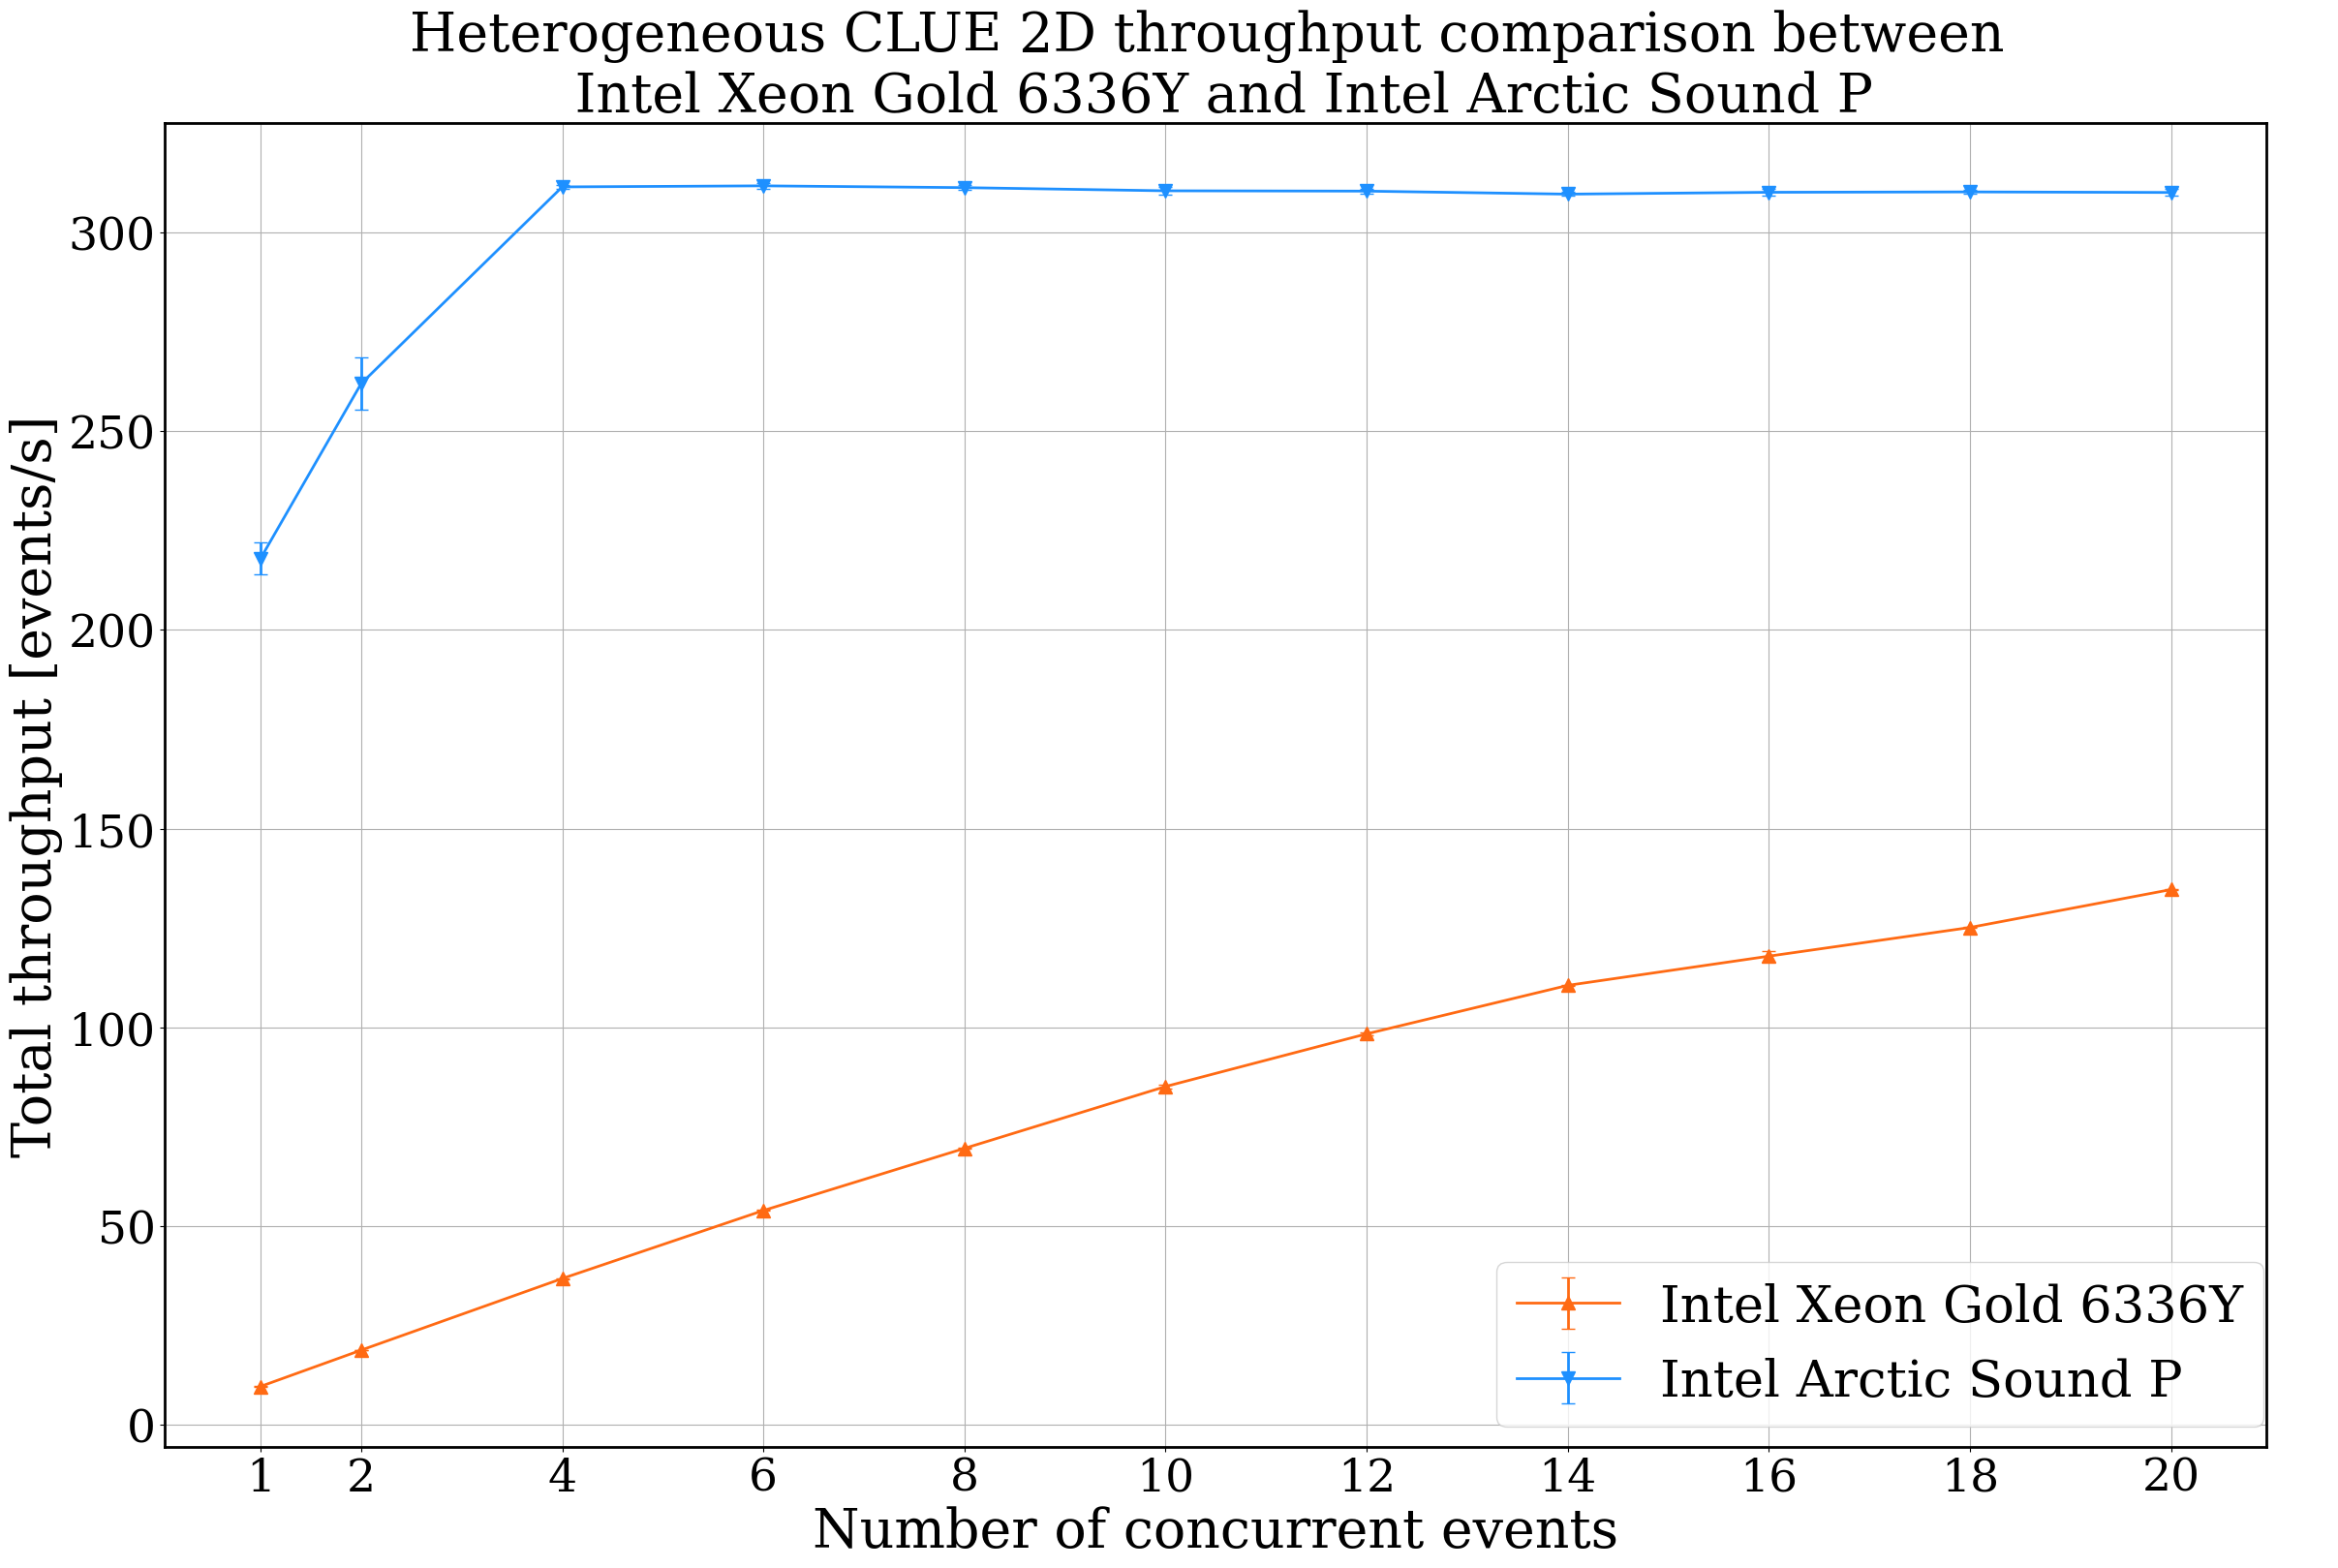

In [2]:
n_streams = (1,2,4,6,8,10,12,14,16,18,20)

olice_cpu = pd.read_csv("data/3d/olice_cpu.csv")["mean"]
err_olice_cpu = pd.read_csv("data/3d/olice_cpu.csv")["std"]

olice_gpu = pd.read_csv("data/3d/olice_gpu.csv")["mean"]
err_olice_gpu = pd.read_csv("data/3d/olice_gpu.csv")["std"]


fig,ax = plt.subplots()

ax.errorbar(n_streams, olice_cpu[:11], err_olice_cpu[:11], label="Intel Xeon Gold 6336Y", linewidth=2,
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_xticks(n_streams)
ax.grid(True)


ax.errorbar(n_streams, olice_gpu, err_olice_gpu, label="Intel Arctic Sound P", linewidth=2, marker='v', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.legend(loc=(0.64,0.09), fontsize=38)
plt.xlabel("Number of concurrent events", fontsize = 40)
plt.ylabel("Total throughput [events/s]", fontsize=40)
plt.title("Heterogeneous CLUE 2D throughput comparison between \n Intel Xeon Gold 6336Y and Intel Arctic Sound P", fontsize=40)
plt.show()

# CPU implementations
Running on Intel Xeon Silver 4114 (Patatrack02) with 2 by 2 scaling of threads from 1 to 20. 

Command used:
```bash
for i in {1..10}; do taskset -c 0 ./sycl --dim 3 --device cpu --maxEvents 100 --numberOfThreads 1 >> sycl_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 100 events for 1 thread, 1000 for multiple threads.

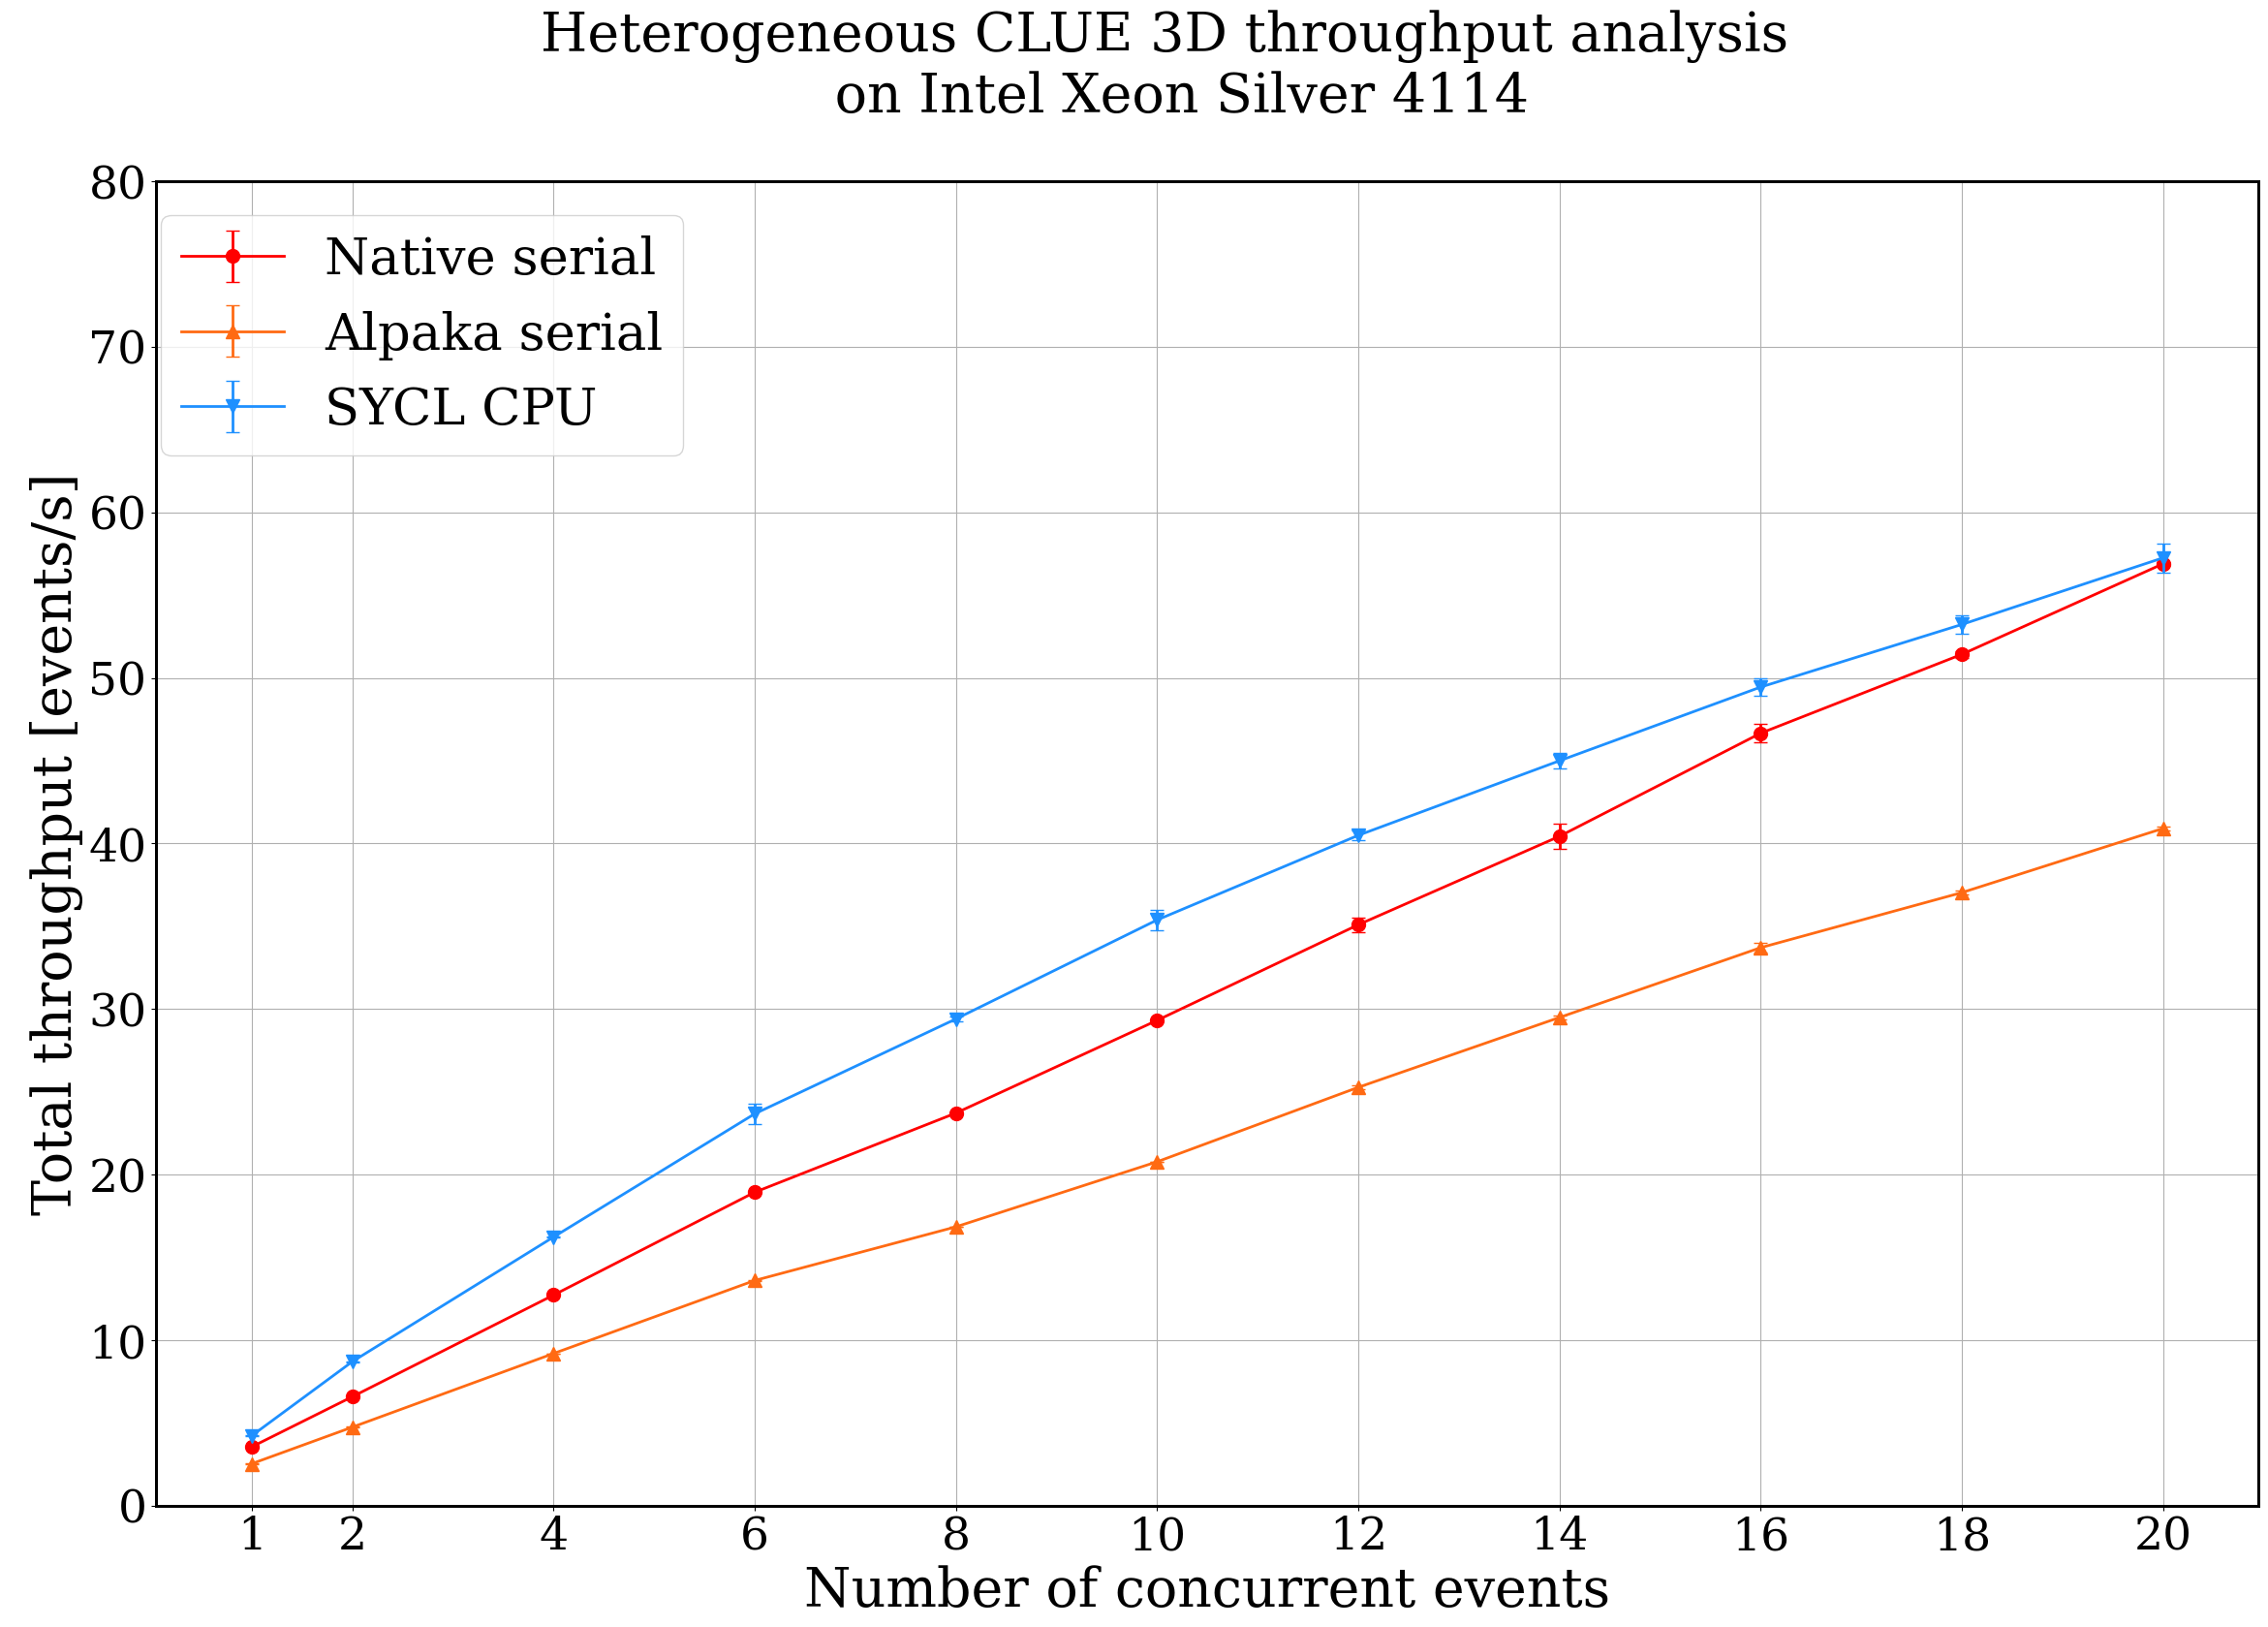

In [3]:
n_threads = (1,2,4,6,8,10,12,14,16,18,20)

alpaka_cpu = pd.read_csv("data/3d/alpaka_cpu.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/3d/alpaka_cpu.csv")["std"]

serial = pd.read_csv("data/3d/serial.csv")["mean"]
err_serial = pd.read_csv("data/3d/serial.csv")["std"]

sycl_cpu = pd.read_csv("data/3d/sycl_cpu.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/3d/sycl_cpu.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, serial, err_serial, label="Native serial", linewidth=2,
                marker='o', markersize=10, color='red', mfc='red', mec="red", ecolor='red', capsize=5)
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,80)
ax.set_xticks(n_threads)
ax.grid(True)

ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka serial", linewidth=2,
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)           



ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=2, marker='v', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.suptitle("Heterogeneous CLUE 3D throughput analysis \n on Intel Xeon Silver 4114", fontsize=40)
fig.legend(loc=(0.071,0.72), fontsize=38)

plt.show()

# CUDA compatibility
Intel Xeon Silver 4114 + NVIDIA Tesla T4 running alpaka and SYCL code. 2 by 2 scaling of CPU threads (concurrent events) from 1 to 20.

Command used:
```bash
for i in {1..10}; do CUDA_VISIBLE_DEVICES=2 numactl -N 1 ./sycl --dim 3 --device gpu --maxEvents 10000 --numberOfThreads 1 >> sycl_cuda_1.txt; sleep 1; done
```
Used mean of 10 runs for total throughput and standard deviation as error.
Tested on 10000 events.

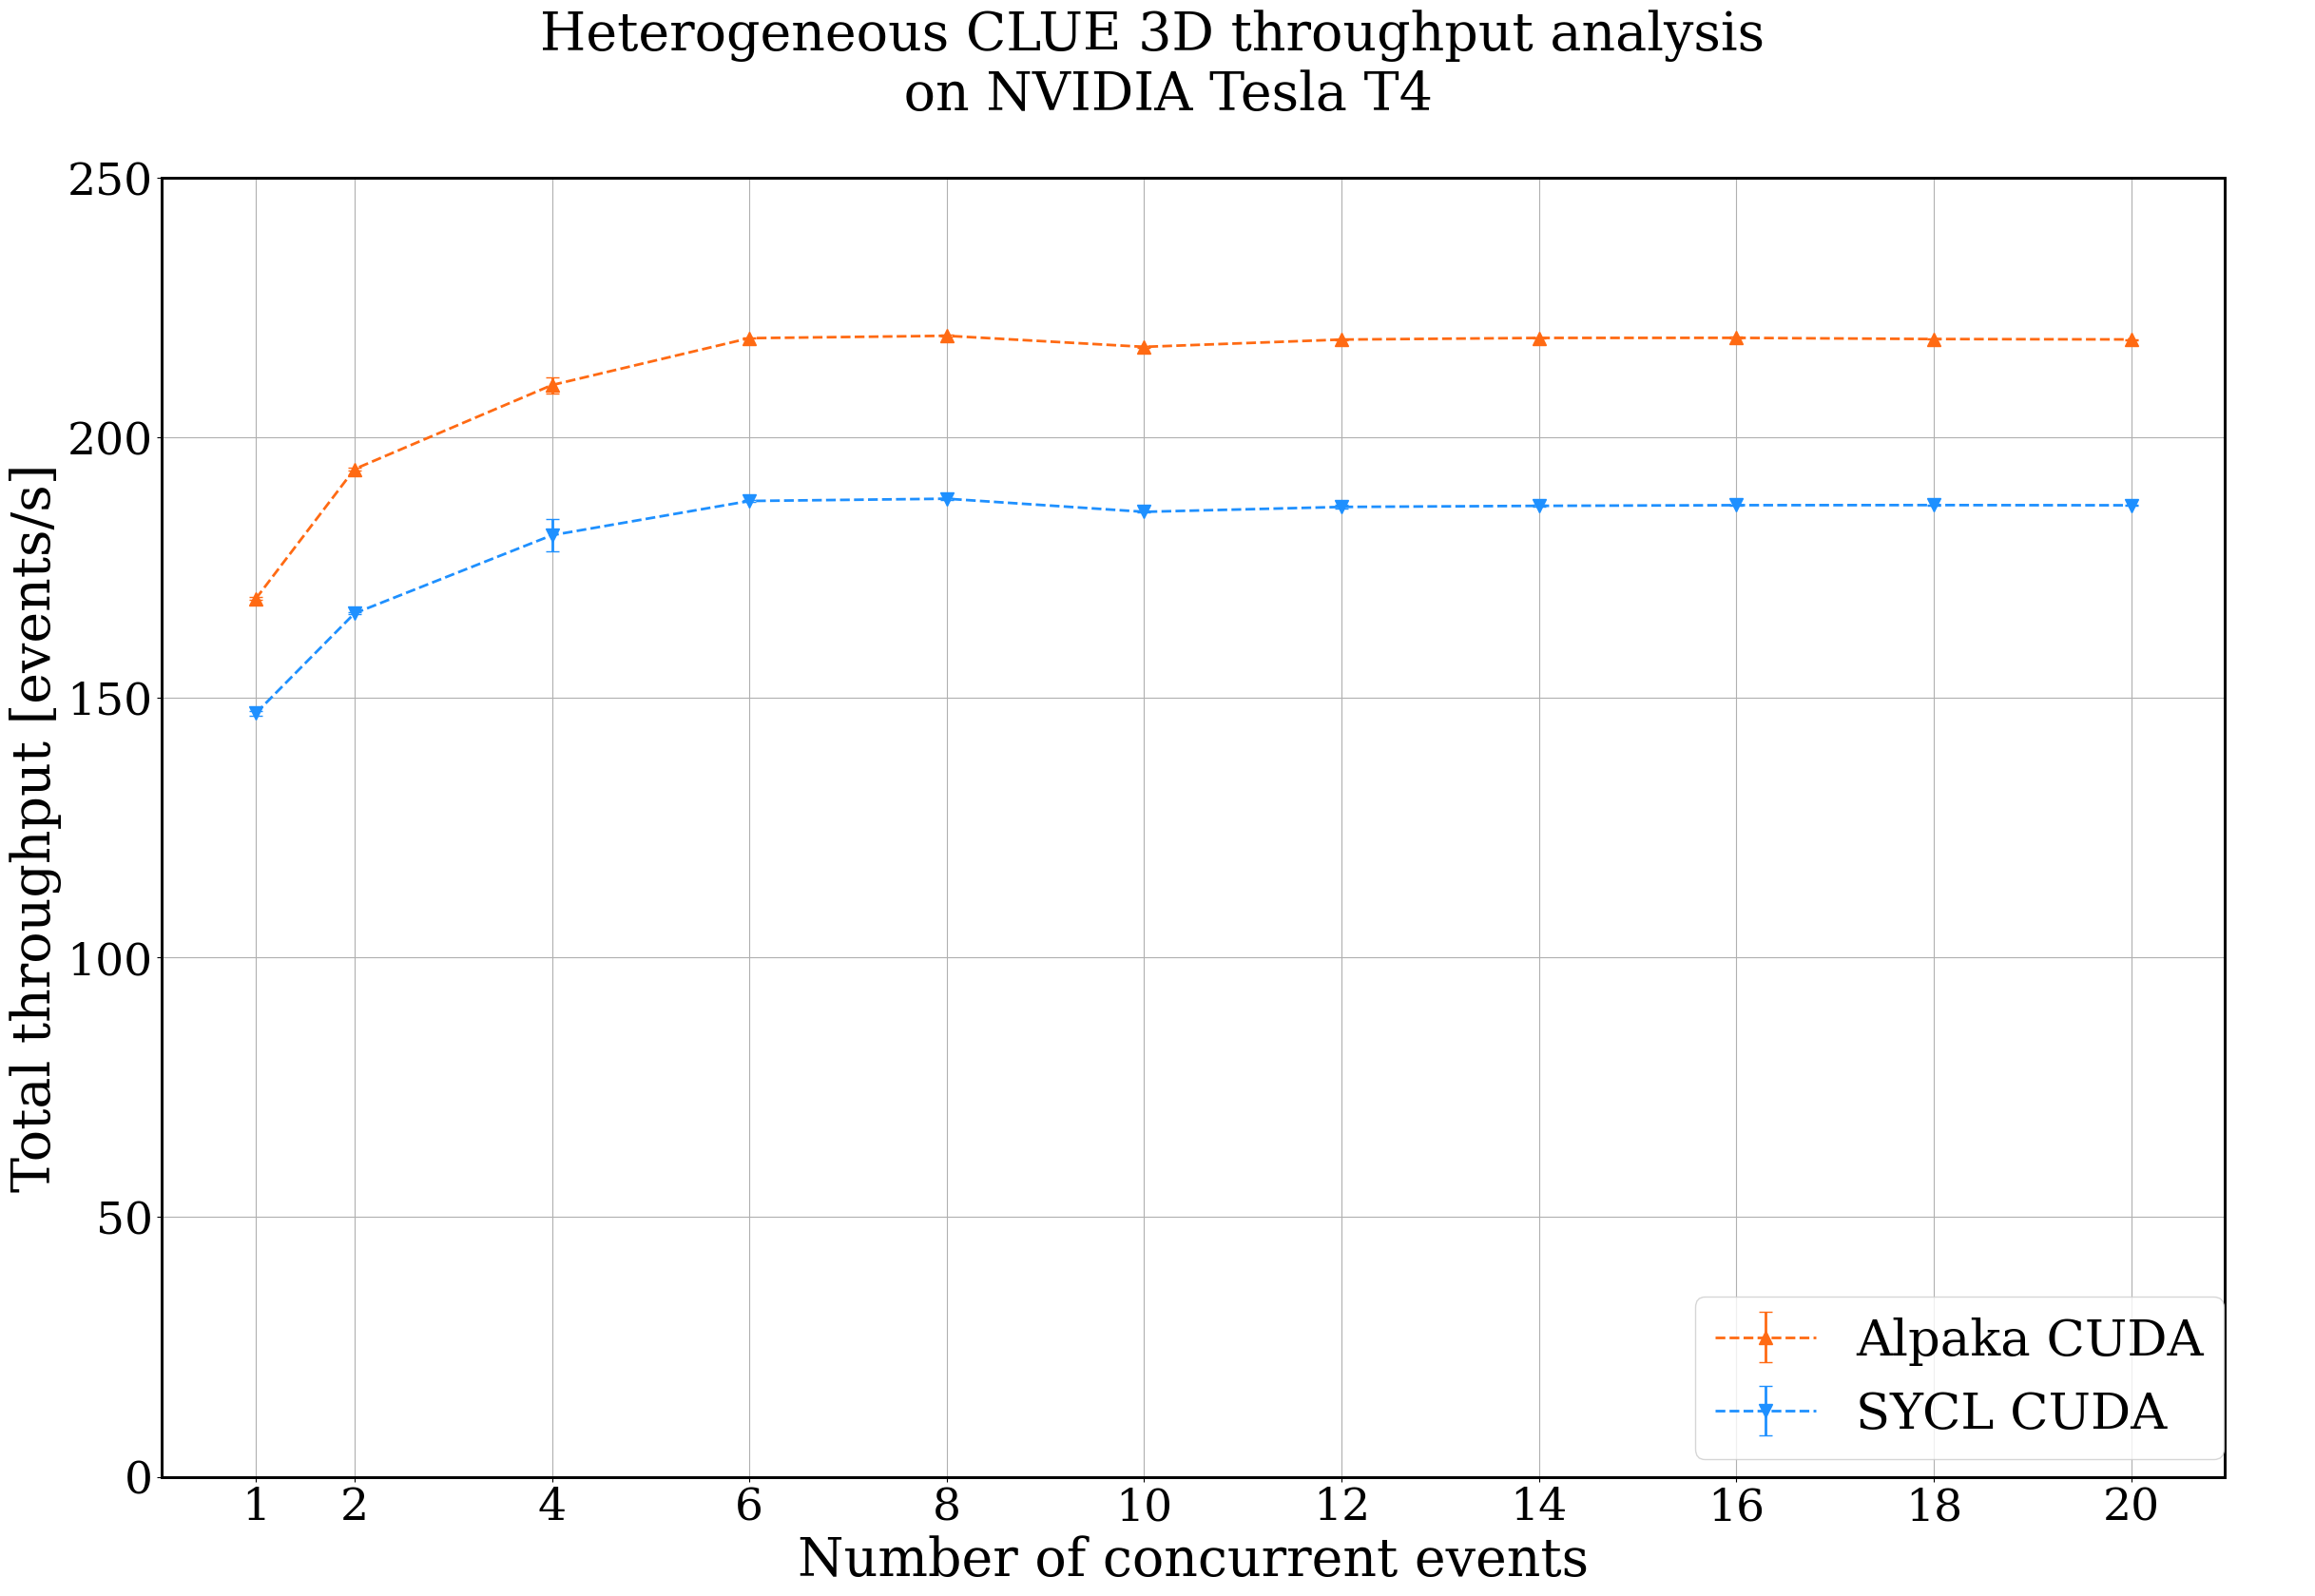

In [4]:
n_threads = (1,2,4,6,8,10,12,14,16,18,20)

alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka CUDA", linewidth=2, linestyle='dashed',
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)           
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,250)
ax.set_xticks(n_threads)
ax.grid(True)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL CUDA", linewidth=2, marker='v', markersize=10,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

fig.suptitle("Heterogeneous CLUE 3D throughput analysis \n on NVIDIA Tesla T4", fontsize=40)
fig.legend(loc=(0.732,0.086), fontsize=38)

plt.show()

# Patatrack02 full comparison CPU and GPU

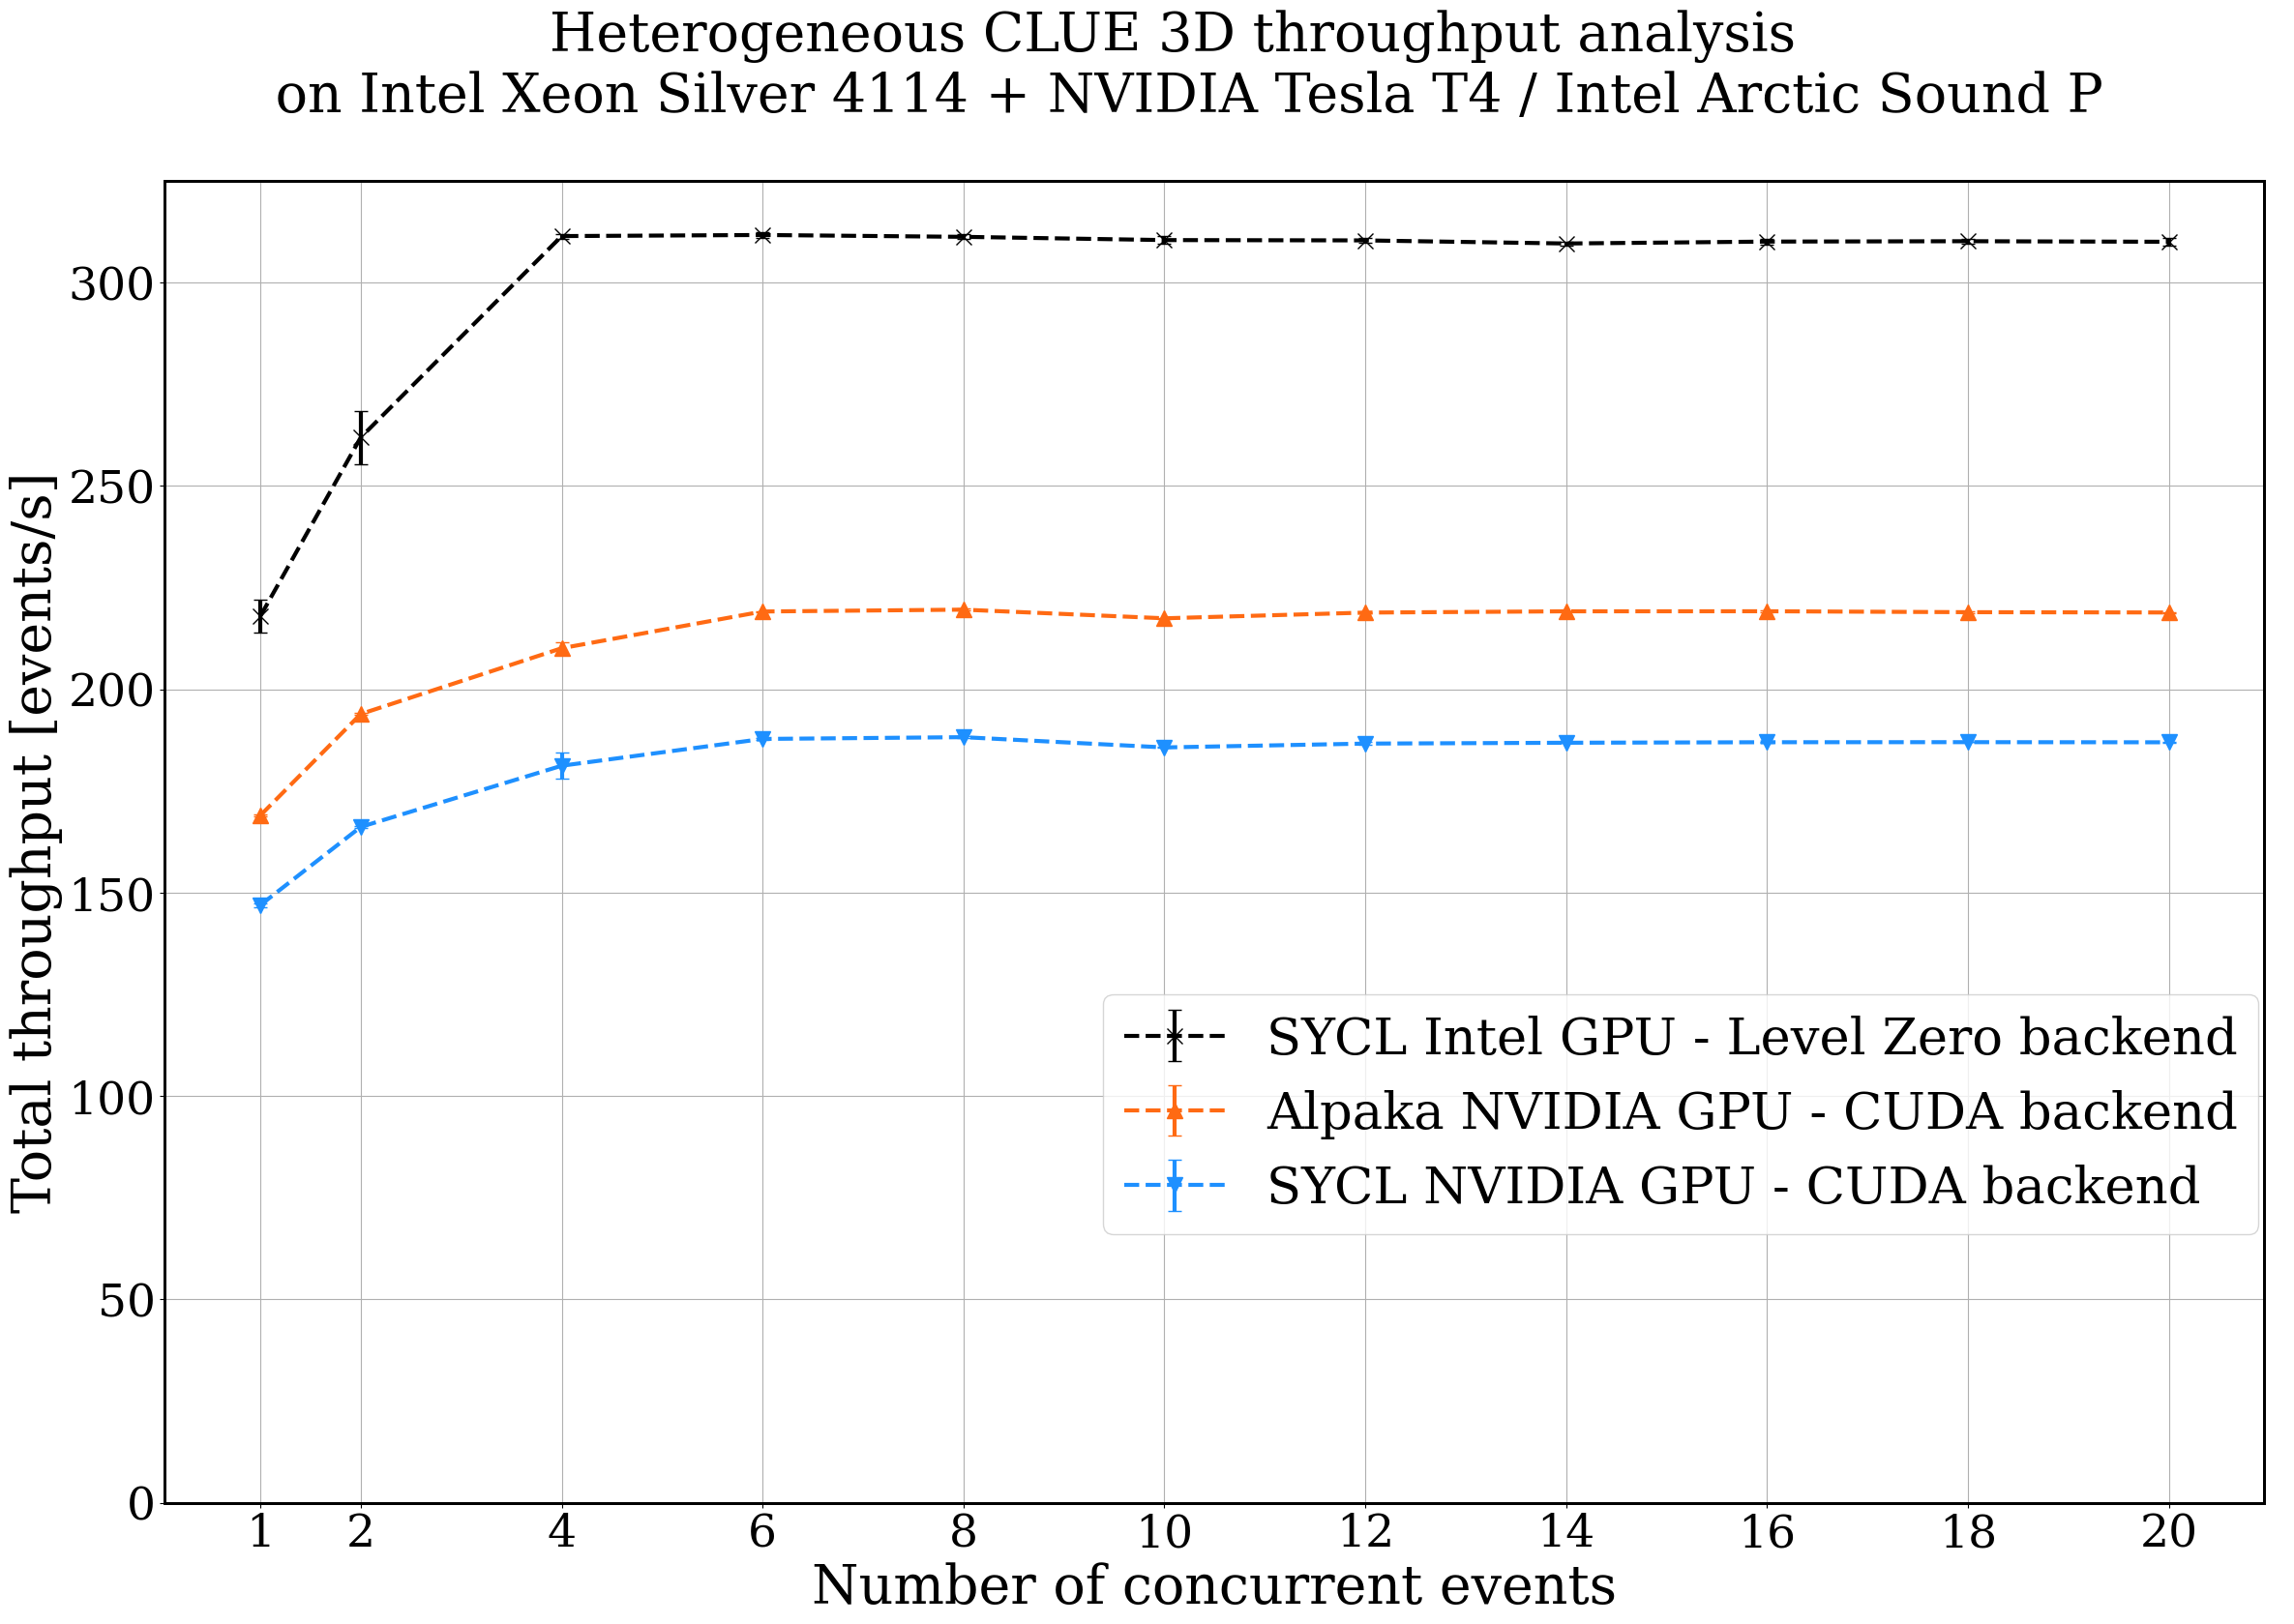

In [5]:
n_threads = (1,2,4,6,8,10,12,14,16,18,20)

alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["std"]

sycl_gpu = pd.read_csv("data/3d/olice_gpu.csv")["mean"]
err_sycl_gpu = pd.read_csv("data/3d/olice_gpu.csv")["std"]

fig,ax = plt.subplots()
ax.errorbar(n_threads, sycl_gpu, err_sycl_gpu, label="SYCL Intel GPU - Level Zero backend", linewidth=3, linestyle='dashed',
                marker='x', markersize=12, color='black', mfc='black', mec="black", ecolor='black', capsize=5)  
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,325)
ax.set_xticks(n_threads)
ax.grid(True)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka NVIDIA GPU - CUDA backend", linewidth=3, linestyle='dashed',
                marker='^', markersize=12, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)  

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL NVIDIA GPU - CUDA backend", linewidth=3, marker='v', markersize=12,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)


fig.suptitle("Heterogeneous CLUE 3D throughput analysis \n on Intel Xeon Silver 4114 + NVIDIA Tesla T4 / Intel Arctic Sound P", fontsize=40)
fig.legend(loc=(0.481,0.24), fontsize=38)

plt.show()

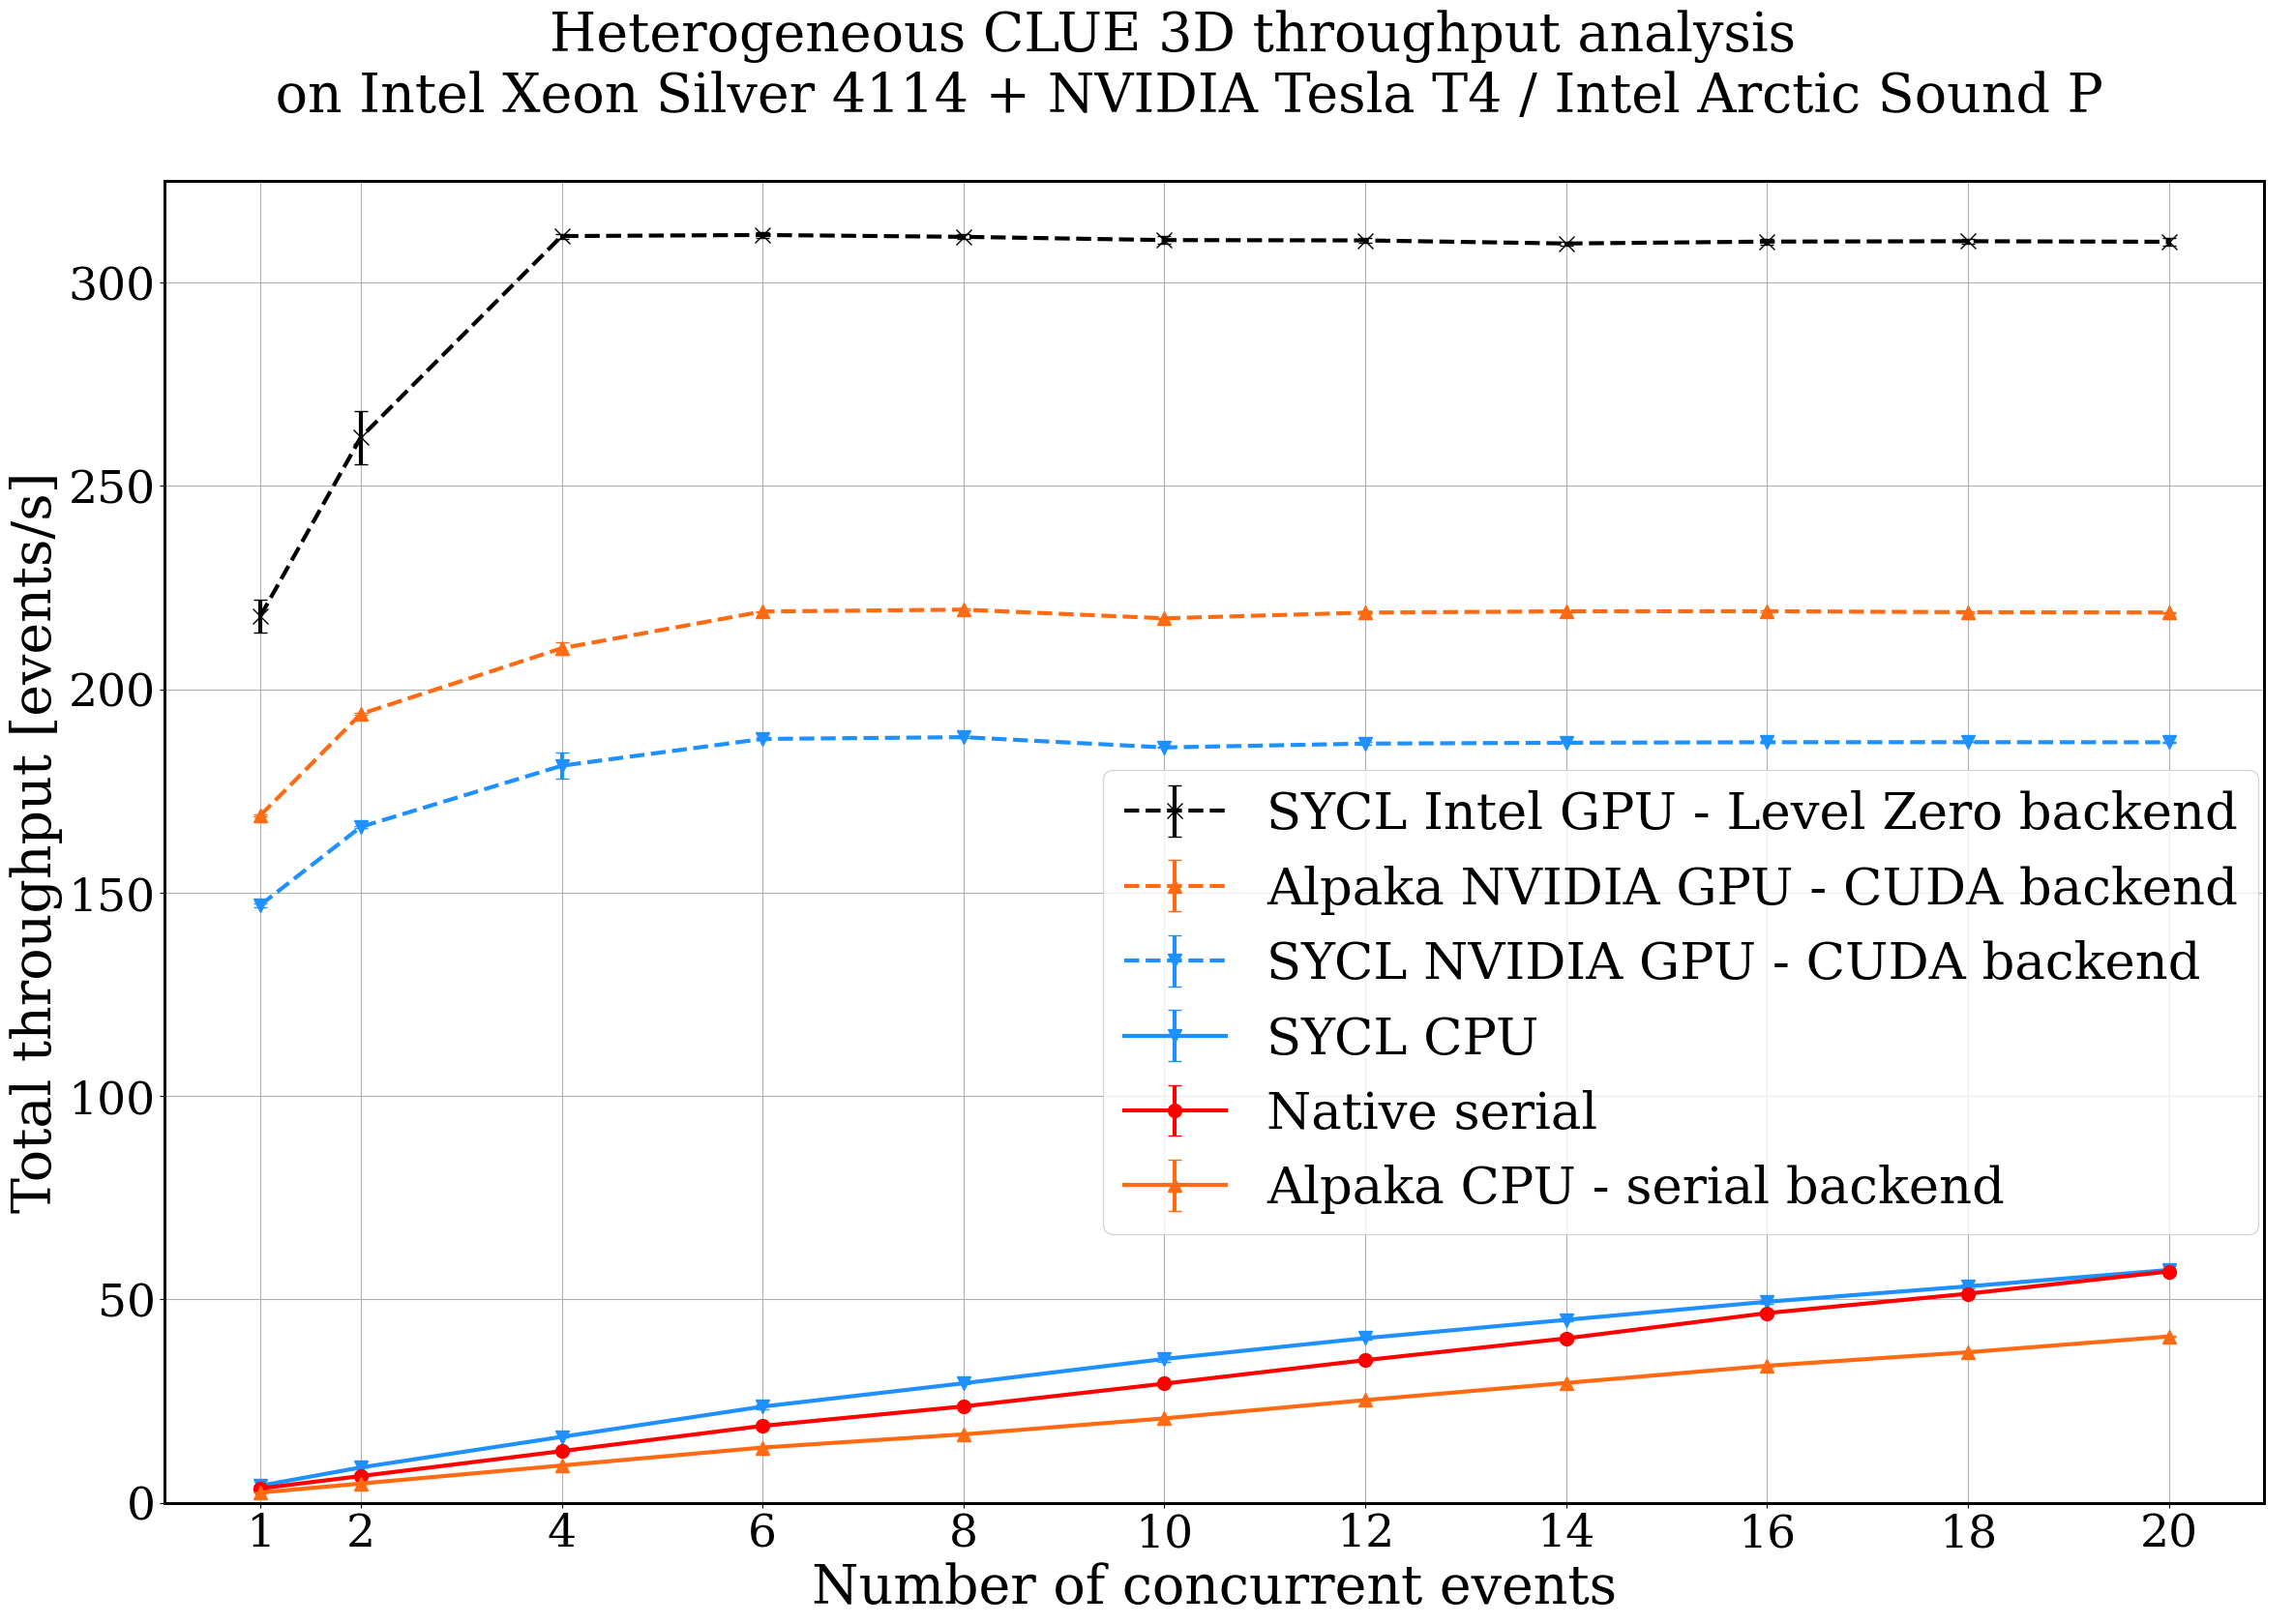

In [7]:
n_threads = (1,2,4,6,8,10,12,14,16,18,20)

alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["mean"]
err_alpaka_cuda = pd.read_csv("data/3d/alpaka_cuda.csv")["std"]

sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["mean"]
err_sycl_cuda = pd.read_csv("data/3d/sycl_cuda.csv")["std"]

alpaka_cpu = pd.read_csv("data/3d/alpaka_cpu.csv")["mean"]
err_alpaka_cpu = pd.read_csv("data/3d/alpaka_cpu.csv")["std"]

serial = pd.read_csv("data/3d/serial.csv")["mean"]
err_serial = pd.read_csv("data/3d/serial.csv")["std"]

sycl_cpu = pd.read_csv("data/3d/sycl_cpu.csv")["mean"]
err_sycl_cpu = pd.read_csv("data/3d/sycl_cpu.csv")["std"]


fig,ax = plt.subplots()
ax.errorbar(n_threads, sycl_gpu, err_sycl_gpu, label="SYCL Intel GPU - Level Zero backend", linewidth=3, linestyle='dashed',
                marker='x', markersize=12, color='black', mfc='black', mec="black", ecolor='black', capsize=5)        
ax.set_xlabel("Number of concurrent events", fontsize = 40)
ax.set_ylabel("Total throughput [events/s]", fontsize=40)
ax.set_ylim(0,325)
ax.set_xticks(n_threads)
ax.grid(True)


ax2=ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(n_threads, alpaka_cuda, err_alpaka_cuda, label="Alpaka NVIDIA GPU - CUDA backend", linewidth=3, linestyle='dashed',
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)    

ax3=ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(n_threads, sycl_cuda, err_sycl_cuda, label="SYCL NVIDIA GPU - CUDA backend", linewidth=3, marker='v', markersize=10,
            linestyle='dashed', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)

ax4=ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(n_threads, sycl_cpu, err_sycl_cpu, label="SYCL CPU", linewidth=3, marker='v', markersize=10,
            color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', capsize=5)


ax5=ax.twiny()
ax5.axes.xaxis.set_visible(False)
ax5.errorbar(n_threads, serial, err_serial, label="Native serial", linewidth=3,
                marker='o', markersize=10, color='red', mfc='red', mec="red", ecolor='red', capsize=5)

ax6=ax.twiny()
ax6.axes.xaxis.set_visible(False)
ax6.errorbar(n_threads, alpaka_cpu, err_alpaka_cpu, label="Alpaka CPU - serial backend", linewidth=3,
                marker='^', markersize=10, color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5)           



fig.suptitle("Heterogeneous CLUE 3D throughput analysis \n on Intel Xeon Silver 4114 + NVIDIA Tesla T4 / Intel Arctic Sound P", fontsize=40)
fig.legend(loc=(0.481,0.24), fontsize=38)

plt.show()